# Import modules

In [1]:
from Model import *
from utilities import *
from sklearn.metrics import accuracy_score,confusion_matrix
from torchsummary import summary
from torch.optim import Adam
from torch.autograd import Variable
import numpy as np
import torch.utils.data as Data
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import copy
import time
import torch
import torch.nn as nn
import pandas as pd
import math
import torch.nn.functional as F
import warnings
warnings.filterwarnings("ignore")

C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\

# Building the dataset

In [2]:
def get_dat(data_num):
    if data_num == 1:
        F_0 = np.load("./bearingset/data/T1_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T1_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T1_source_label.npy")
        Y_1 = np.load("./bearingset/data/T1_target_label.npy")
        Label_Name =["1-OSF","2-OSP","3-ORF","4-ISF","6-IORF","7-IORP","8-H","Unknown"]
    if data_num == 2:
        F_0 = np.load("./bearingset/data/T2_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T2_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T2_source_label.npy")
        Y_1 = np.load("./bearingset/data/T2_target_label.npy")
        Label_Name =["1-OSF","3-ORF","4-ISF","6-IORF","7-IORP","8-H","Unknown"]
    if data_num == 3:
        F_0 = np.load("./bearingset/data/T3_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T3_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T3_source_label.npy")
        Y_1 = np.load("./bearingset/data/T3_target_label.npy")
        Label_Name =["1-OSF","2-OSP","3-ORF","4-ISF","5-IRF","Unknown"]
    if data_num == 4:
        F_0 = np.load("./bearingset/data/T4_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T4_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T4_source_label.npy")
        Y_1 = np.load("./bearingset/data/T4_target_label.npy")
        Label_Name =["1-OSF","4-ISF","6-IORF","8-H","Unknown"]
    if data_num == 5:
        F_0 = np.load("./gearset/data/T1_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T1_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T1_source_label.npy")
        Y_1 = np.load("./gearset/data/T1_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    if data_num == 6:
        F_0 = np.load("./gearset/data/T2_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T2_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T2_source_label.npy")
        Y_1 = np.load("./gearset/data/T2_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    if data_num == 7:
        F_0 = np.load("./gearset/data/T3_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T3_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T3_source_label.npy")
        Y_1 = np.load("./gearset/data/T3_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    F_0=torch.from_numpy(F_0.astype(np.float32))
    F_1=torch.from_numpy(F_1.astype(np.float32))
    Y_0=torch.from_numpy(Y_0.astype(np.float32))
    Y_1=torch.from_numpy(Y_1.astype(np.float32))
    data_0 = Data.TensorDataset(F_0,Y_0)
    data_1 = Data.TensorDataset(F_1,Y_1)
    return data_0,data_1,F_0,F_1,Y_0,Y_1,Label_Name
def Split(full_dataset):
    test_size = 200
    train_size = len(full_dataset) - test_size
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    return train_dataset, test_dataset

# Model 

## Model initialization

In [3]:
task_num = 1
setGPU('0')
log = Logger('./log/DCTLN/', clear=True)

data_0,data_1,F_0,F_1,Y_0,Y_1,Label_Name = get_dat(task_num)
Train_0,Test_0 = Split(data_0)
Train_1,Test_1 = Split(data_1)
src_train_loader=Data.DataLoader(dataset=Train_0,batch_size=40,shuffle=True,num_workers=0)
tgt_train_loader=Data.DataLoader(dataset=Train_1,batch_size=40,shuffle=True,num_workers=0)
src_test_loader=Data.DataLoader(dataset=Test_0,batch_size=40,shuffle=True,num_workers=0)
tgt_test_loader=Data.DataLoader(dataset=Test_1,batch_size=40,shuffle=True,num_workers=0)

num_class = Y_0.shape[1]-1
discriminator = LargeAdversarialNetwork(1024).cuda()
feature_extractor = CNN_2D().cuda()
cls = CLS(1024, num_class+1).cuda()
net = nn.Sequential(feature_extractor, cls).cuda()

gpu(s) to be used: ['0']



## Model training

In [4]:
scheduler = lambda step, initial_lr : inverseDecaySheduler(step, initial_lr, gamma=10, power=0.75, max_iter=10000)
optimizer_discriminator = OptimWithSheduler(optim.Adam(net.parameters(), lr= 5e-4, weight_decay=5e-4),scheduler)
optimizer_feature_extractor = OptimWithSheduler(optim.Adam(net.parameters(), lr= 5e-4, weight_decay=5e-4),scheduler)
optimizer_cls = OptimWithSheduler(optim.Adam(net.parameters(), lr= 5e-4, weight_decay=5e-4),scheduler)                      
k=0
acc = 0

while k <=100:
    for (i, ((im_source, label_source), (im_target, label_target))) in enumerate (zip(src_train_loader,tgt_train_loader)):        
        fs1, feature_source, predict_prob_source = net.forward(im_source.cuda())
        ft1, feature_target, predict_prob_target = net.forward(im_target.cuda())       
        domain_prob_discriminator_1_source = discriminator.forward(fs1)
        domain_prob_discriminator_1_target = discriminator.forward(ft1)
        ce = CrossEntropyLoss(label_source.cuda(), predict_prob_source.cuda()) 
        adv_loss = BCELossForMultiClassification(label=torch.ones_like(domain_prob_discriminator_1_source), predict_prob=domain_prob_discriminator_1_source )
        adv_loss+= BCELossForMultiClassification(label=torch.ones_like(domain_prob_discriminator_1_target), predict_prob=1 - domain_prob_discriminator_1_target)
        with OptimizerManager([optimizer_feature_extractor,optimizer_cls,optimizer_discriminator]):
            loss =  ce +  adv_loss
            loss.backward()         
        k += 1
        log.step += 1
        if log.step % 100 == 1:
            counter = AccuracyCounter()
            counter.addOntBatch(variable_to_numpy(predict_prob_target), variable_to_numpy(label_target))
            acc_train = Variable(torch.from_numpy(np.asarray([counter.reportAccuracy()], dtype=np.float32))).cuda()            
            track_scalars(log, ['ce', 'acc_train'], globals())
            torch.save(net.state_dict(), './models/Compared_Methods_DCTLN.pkl') 


{'ce': 2.0794897079467773, 'acc_train': 0.10000000149011612}
{'ce': 2.3350918127107434e-05, 'acc_train': 0.7749999761581421}


# Performance visualization

## The confusion matrix

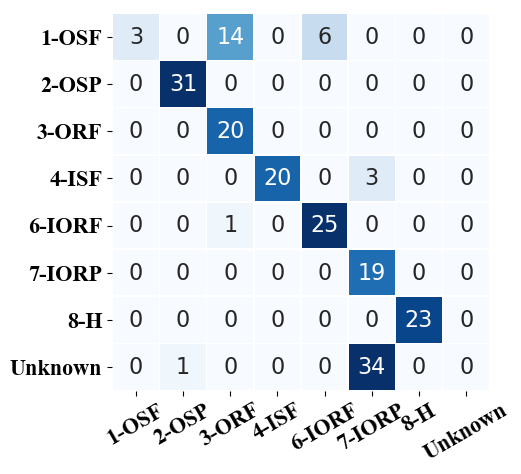

In [5]:
net_path = './models/Compared_Methods_DCTLN.pkl'
net.load_state_dict(torch.load(net_path))

True_label = []
Pred_Label = []
for (i, (im, label)) in enumerate(tgt_test_loader):

    ss, _,  predict_prob = net.forward(im.cuda())
    
    label = np.argmax(label, axis=-1).reshape(-1, 1)
    predict_index = np.argmax(predict_prob.cpu().detach().numpy(), axis=-1).reshape(-1, 1)
    
    True_label.append(np.array(label.flatten()))
    Pred_Label.append(np.array(predict_index.flatten()))

y_true = np.array(True_label).reshape((200,))
y_pred = np.array(Pred_Label).reshape((200,))

m = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(5,5),dpi=100)
ax= sns.heatmap(m,vmin=0, vmax=25,cmap='Blues',annot=True,fmt='',linewidths=.5,square=True,cbar=None,annot_kws={"size":16})
plt.xticks(fontsize= 16, fontfamily= "Times New Roman")                      
plt.yticks(fontsize= 16, fontfamily= "Times New Roman") 
plt.margins(0, 0)
ax.set_xticklabels(Label_Name,rotation=30)
ax.set_yticklabels(Label_Name,rotation=0)

plt.margins(0, 0)

## The accuracy

In [6]:
pred_y = []
true_y = []
NUM_CLASSES = Y_1.shape[1]
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(tgt_test_loader):
        data, target = data.cuda(), target.cuda(non_blocking=True)
        ss, _,  predict_prob = net(data)
        pred = predict_prob.max(1, keepdim=True)[1] 
        for i in range(len(pred)):
            pred_y.append(pred[i].item())
            true_y.append(torch.argmax(target[i]).item())
a,b = utils.cal_acc(true_y, pred_y, NUM_CLASSES)
print("The accuracy on all the known classes: "+str(a))
print("The accuracy on all the target classes: "+str(b))

The accuracy on all the known classes: 0.71
The accuracy on all the target classes: 0.8606060606060606
